In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import timedelta, datetime

import warnings
warnings.filterwarnings("ignore")
plt.ion()

##### plotting defaults

In [3]:
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

1. Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

2. For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [5]:
item_demand = pd.read_csv('/Users/hector/Documents/cached_csvs/total_sales_data.csv')
item_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_address  913000 non-null  object 
 4   store_city     913000 non-null  object 
 5   store_id       913000 non-null  int64  
 6   store_state    913000 non-null  object 
 7   store_zipcode  913000 non-null  int64  
 8   item_brand     913000 non-null  object 
 9   item_id        913000 non-null  int64  
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
 14  month          913000 non-null  object 
 15  weekday        913000 non-null  object 
 16  sales_total    913000 non-null  float64
dtypes: float64(3), int64(6), obje

In [6]:
item_demand.head()

,sale_date,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
0,2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
1,2013-01-01,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2,2013-01-01,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
3,2013-01-01,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
4,2013-01-01,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


In [7]:
item_demand.sale_date = pd.to_datetime(item_demand.sale_date)
df = item_demand.set_index('sale_date').sort_index()

In [8]:
# Percentage
train_size = .80
test_size = .20

train_end_index = round(df.shape[0] * train_size)
train = df.iloc[:train_end_index]
test = df.iloc[train_end_index:]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730400 entries, 2013-01-01 to 2016-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    730400 non-null  float64
 1   sale_id        730400 non-null  int64  
 2   store_address  730400 non-null  object 
 3   store_city     730400 non-null  object 
 4   store_id       730400 non-null  int64  
 5   store_state    730400 non-null  object 
 6   store_zipcode  730400 non-null  int64  
 7   item_brand     730400 non-null  object 
 8   item_id        730400 non-null  int64  
 9   item_name      730400 non-null  object 
 10  item_price     730400 non-null  float64
 11  item_upc12     730400 non-null  int64  
 12  item_upc14     730400 non-null  int64  
 13  month          730400 non-null  object 
 14  weekday        730400 non-null  object 
 15  sales_total    730400 non-null  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 94.7+ MB


In [10]:
train.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


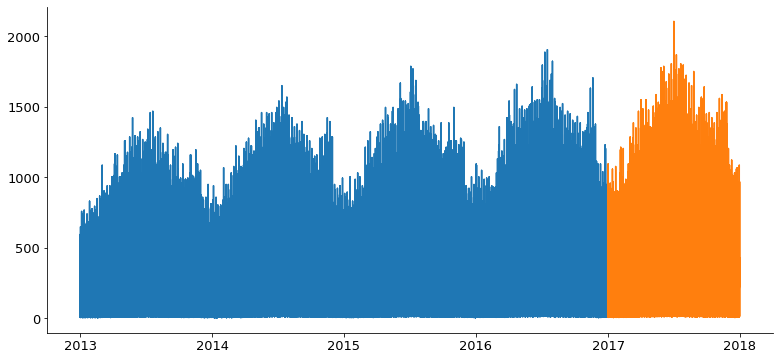

In [14]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [15]:
y = train.sales_total

In [16]:
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

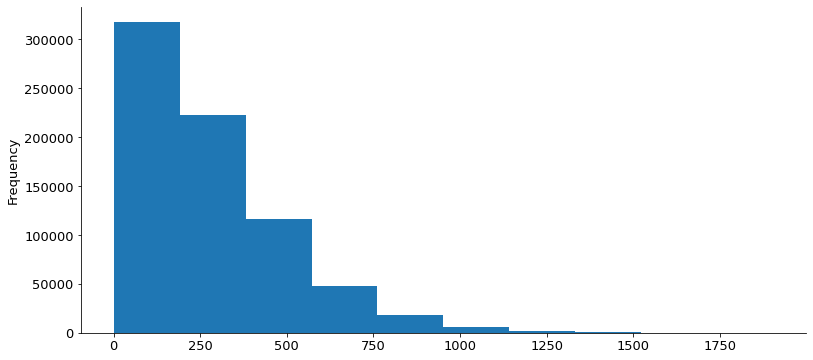

In [17]:
y.plot.hist()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

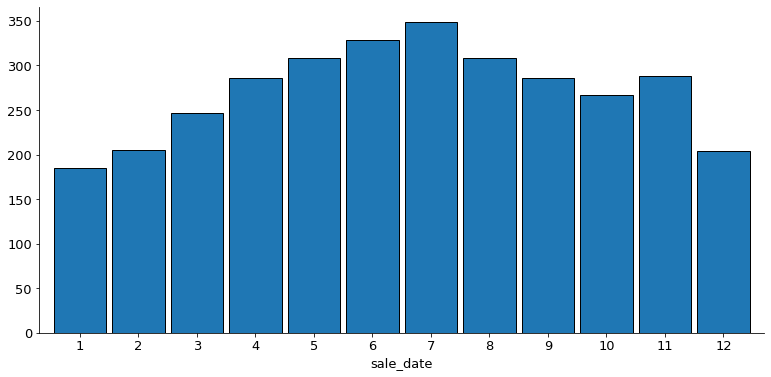

In [25]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)

<AxesSubplot:xlabel='sale_date'>

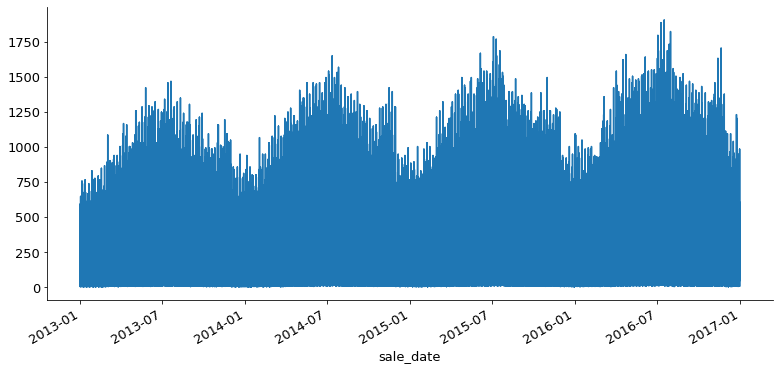

In [27]:
y.plot()

<AxesSubplot:title={'center':'Monthly Average'}, xlabel='sale_date'>

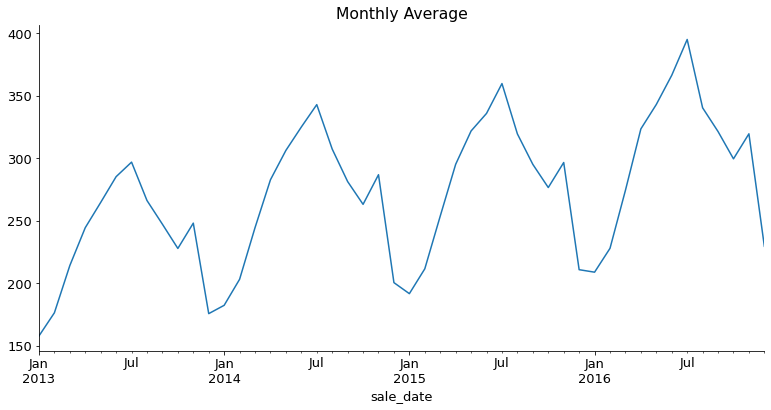

In [29]:
y.resample('M').mean().plot(title='Monthly Average')

<AxesSubplot:title={'center':'yearly average'}, xlabel='sale_date'>

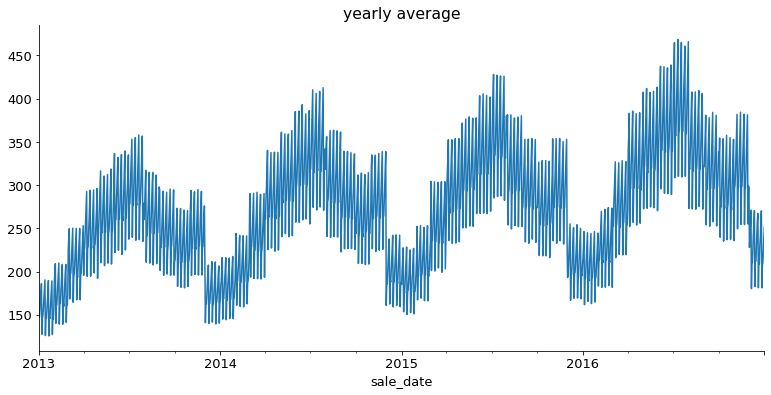

In [30]:
y.resample('D').mean().plot(title='yearly average')

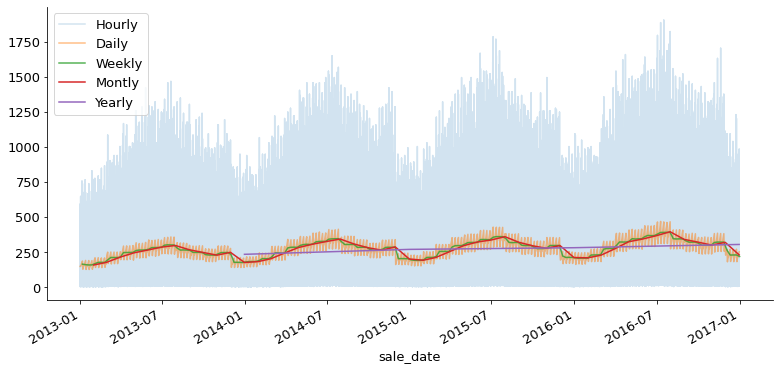

In [31]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

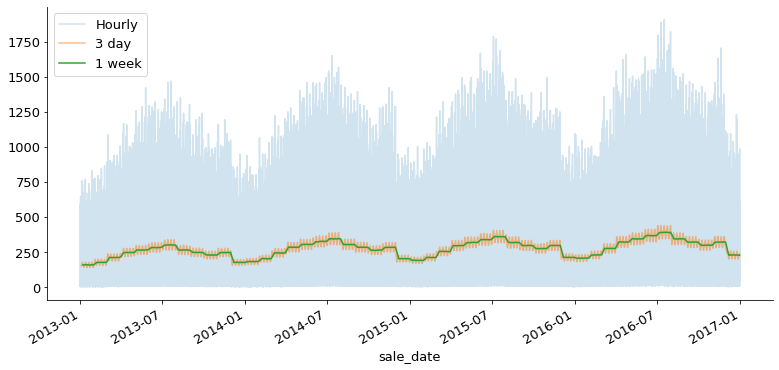

In [32]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in sales'}, xlabel='sale_date'>

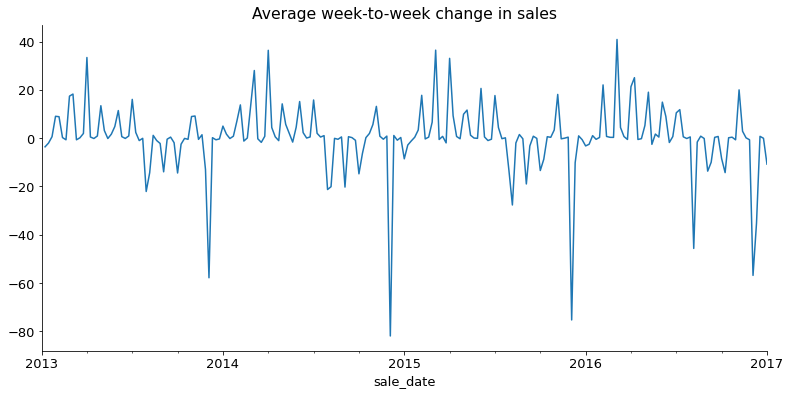

In [36]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales')

<AxesSubplot:title={'center':'Average month-to-month change in sales'}, xlabel='sale_date'>

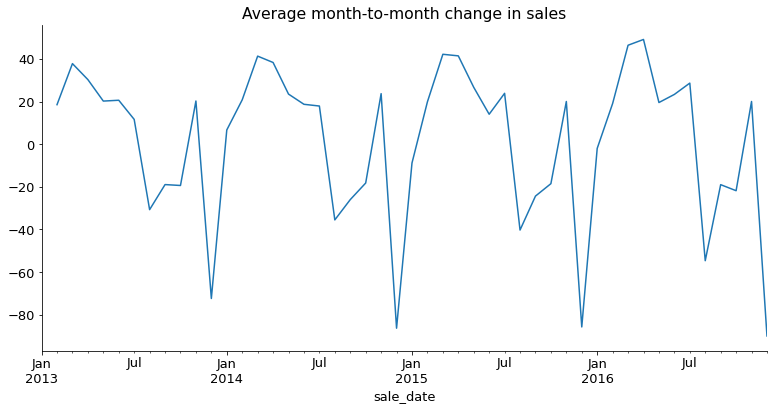

In [35]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

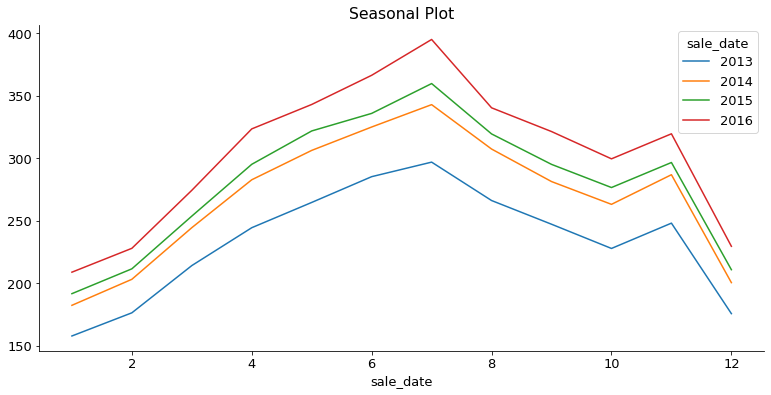

In [37]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

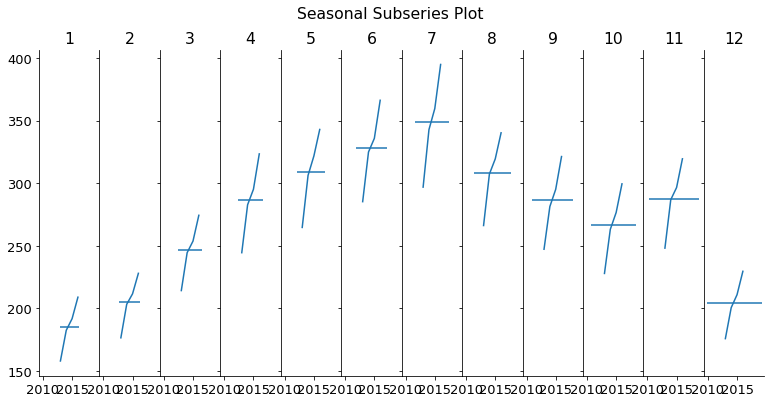

In [38]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

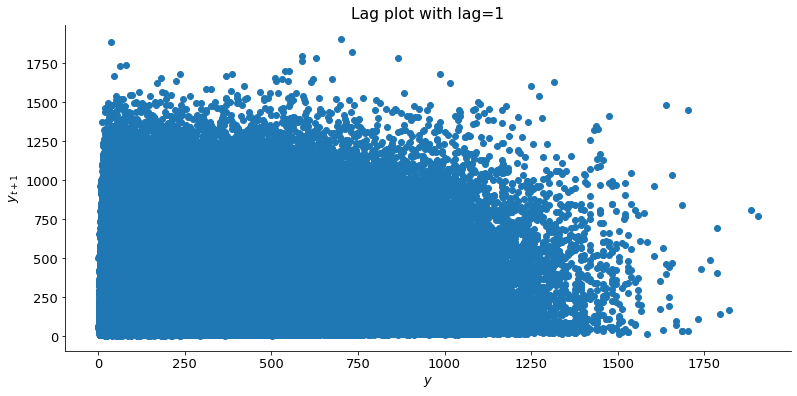

In [39]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

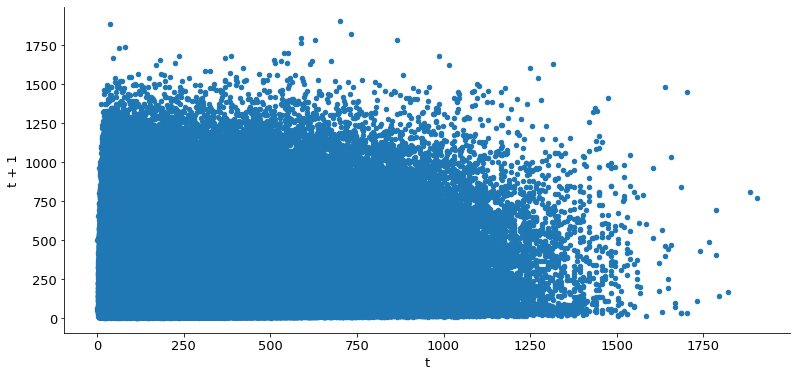

In [41]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [42]:
del train['y(t + 1)']

,sale_amount,sale_id,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,this_week,the_next_week
sale_date,,,,,,,,,,
2013-01-06,30.355667,455590.500000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,163.589167,159.981203
2013-01-13,29.686286,455597.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,159.981203,157.946720
2013-01-20,29.414286,455604.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,157.946720,158.545383
2013-01-27,29.513714,455611.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,158.545383,167.585014
2013-02-03,31.150571,455618.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,167.585014,176.455603
...,...,...,...,...,...,...,...,...,...,...
2016-12-04,49.016857,457018.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,263.768997,228.559894
2016-12-11,42.618571,457025.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,228.559894,229.298643
2016-12-18,42.682286,457032.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,229.298643,229.231000


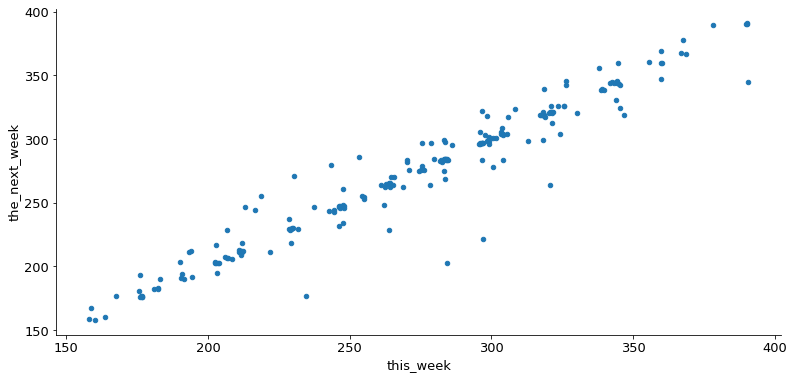

In [43]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,sale_amount,sale_id,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,this_week,12_weeks_out
sale_date,,,,,,,,,,
2013-01-06,30.355667,455590.500000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,163.589167,213.002663
2013-01-13,29.686286,455597.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,159.981203,246.387280
2013-01-20,29.414286,455604.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,157.946720,246.861371
2013-01-27,29.513714,455611.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,158.545383,246.690086
2013-02-03,31.150571,455618.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,167.585014,247.582229
...,...,...,...,...,...,...,...,...,...,...
2016-12-04,49.016857,457018.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,263.768997,NaN
2016-12-11,42.618571,457025.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,228.559894,NaN
2016-12-18,42.682286,457032.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,229.298643,NaN


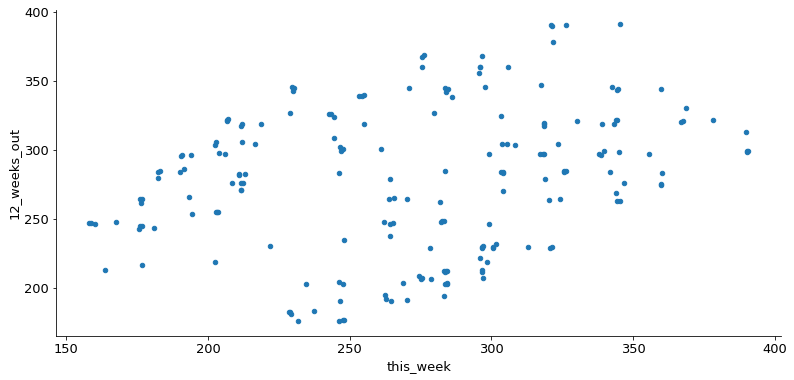

In [44]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,sale_amount,sale_id,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,this_week,half_a_year_later
sale_date,,,,,,,,,,
2013-01-06,30.355667,455590.500000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,163.589167,299.209394
2013-01-13,29.686286,455597.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,159.981203,301.578849
2013-01-20,29.414286,455604.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,157.946720,300.565134
2013-01-27,29.513714,455611.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,158.545383,300.484531
2013-02-03,31.150571,455618.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,167.585014,278.376257
...,...,...,...,...,...,...,...,...,...,...
2016-12-04,49.016857,457018.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,263.768997,NaN
2016-12-11,42.618571,457025.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,228.559894,NaN
2016-12-18,42.682286,457032.000000,5.500000,78224.80000,25.500000,5.160400,2.384688e+11,2.384688e+11,229.298643,NaN


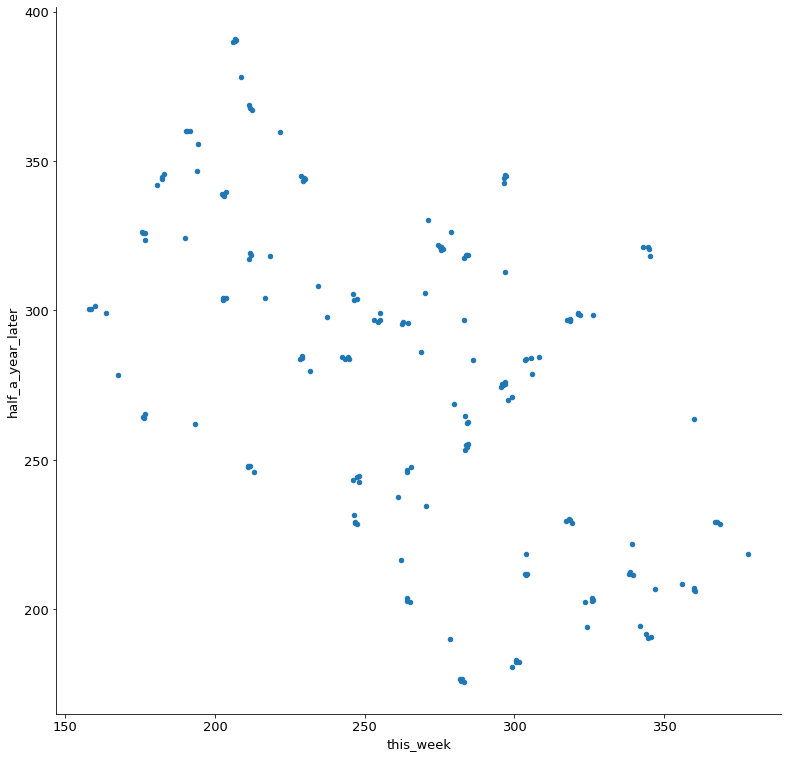

In [45]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

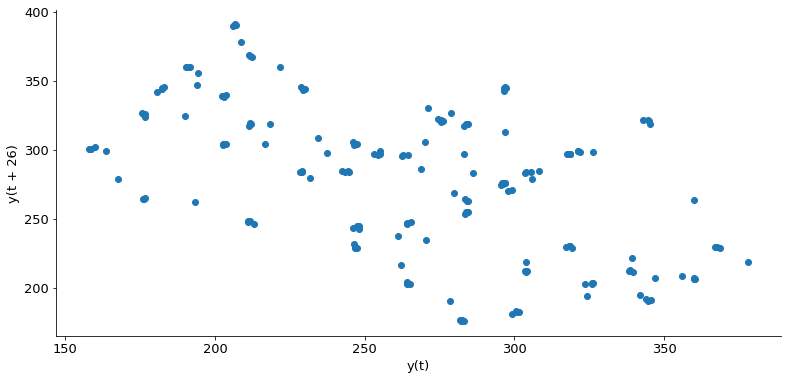

In [47]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

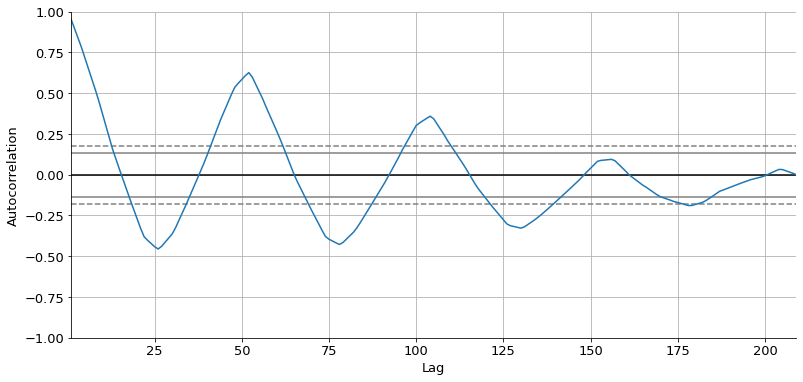

In [48]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [49]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434874,NaN
2013-01-13,159.981203,NaN,-79.225842,NaN
2013-01-20,157.946720,NaN,-79.904368,NaN
2013-01-27,158.545383,NaN,-80.259441,NaN
2013-02-03,167.585014,NaN,-77.352776,NaN


<AxesSubplot:xlabel='sale_date'>

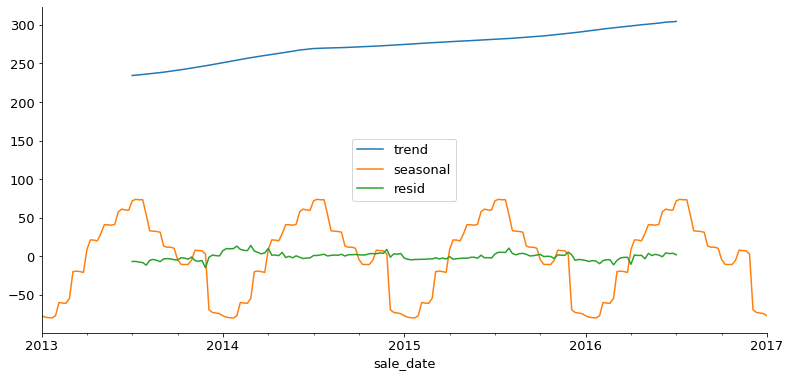

In [50]:
decomposition.iloc[:, 1:].plot()

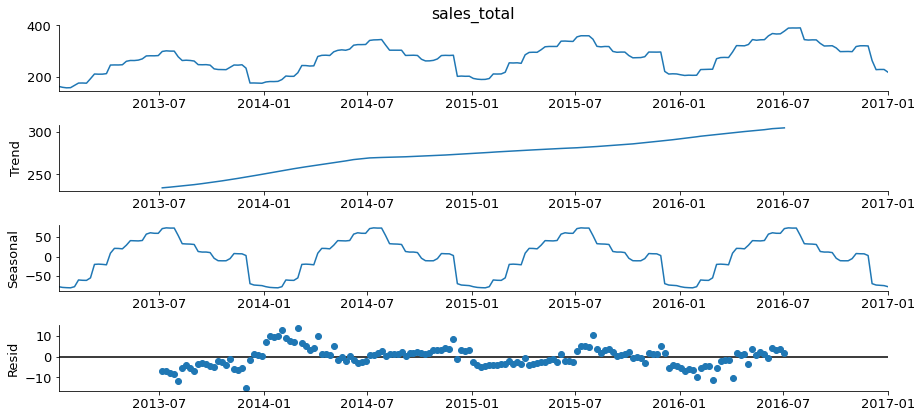

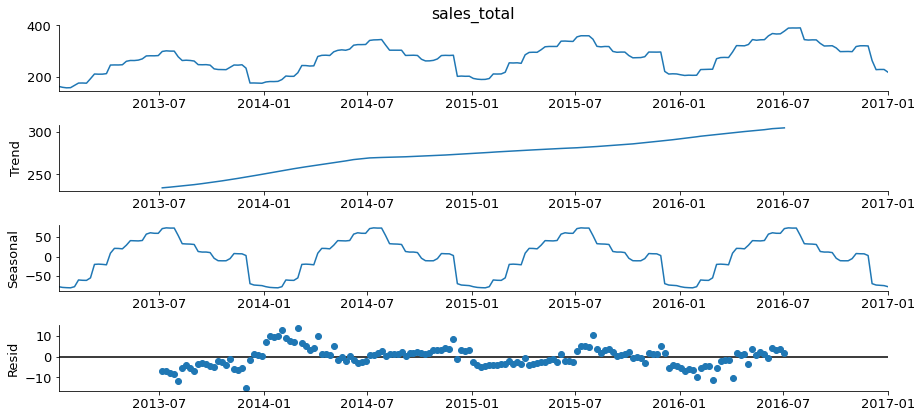

In [51]:
result.plot()

In [52]:
train = train.resample('D').mean()
# create a categorical feature
train['salestotal_bin'] = pd.qcut(train.sales_total, 4, labels=['low', 'low-mid', 'mid', 'high'])
train.groupby('salestotal_bin').mean()

,sale_amount,sale_id,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sales_total
salestotal_bin,,,,,,,,,
low,35.243760,456121.759563,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,189.479608
low-mid,45.928477,456241.021658,5.500048,78224.799616,25.499473,5.160309,2.384866e+11,2.384866e+11,246.918117
mid,54.628729,456350.989041,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,293.702219
high,66.681079,456549.224658,5.500000,78224.800000,25.500000,5.160400,2.384688e+11,2.384688e+11,358.484977


Text(0, 0.5, '% of days in the month')

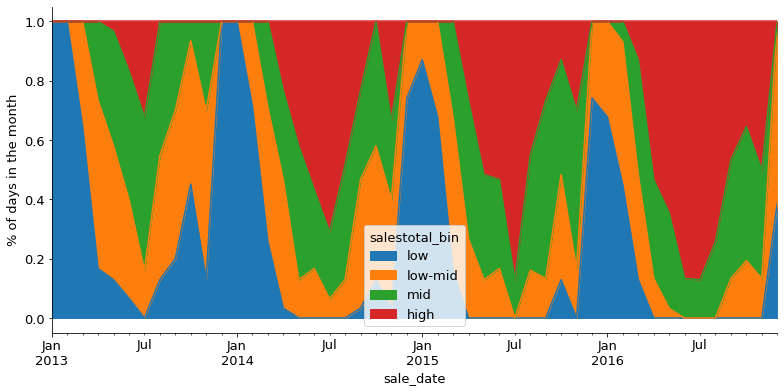

In [53]:
(train.groupby('salestotal_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

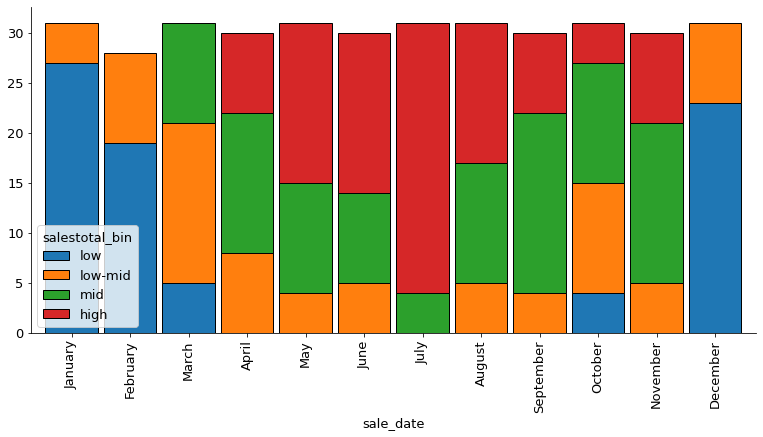

In [54]:
ax = (train['2015']
 .groupby('salestotal_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

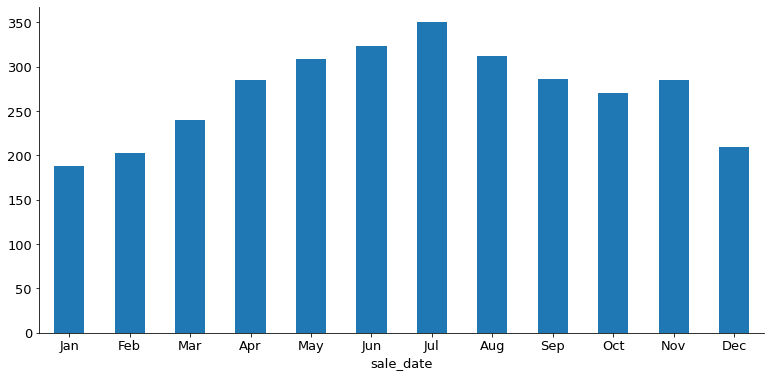

In [55]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None


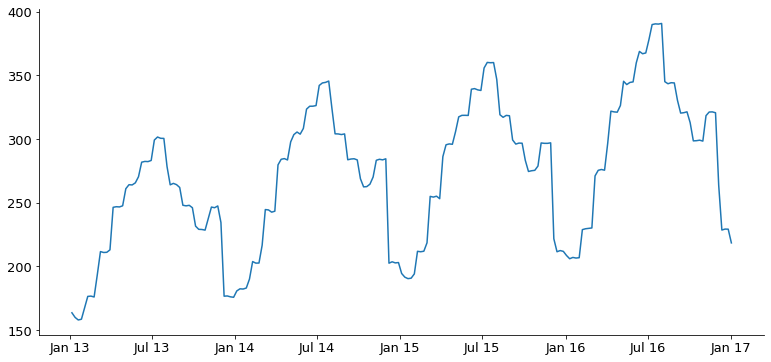

In [56]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))
